# Notebook to Render Plots for RA 1: Test Strategies
_Optimization of Automated and Manual Software Tests in Industrial Practice_

**Usage**: Run all cells of this notebook to reproduce the plot for RQ1.4 on current costs and benefits of our study subjects. The plot will be stored as `rq1-4-cost-benefit.pdf` next to this notebook.


In [61]:
!pip3 install pandas numpy matplotlib openpyxl tabulate

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [62]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
%matplotlib inline
plt.style.use('default')

## Plotting Utilities


In [63]:
from matplotlib.ticker import MaxNLocator

subjects = ["Time", "BVK", "Dolby", "ILP", "Zeiss"]

primary_color = "#5c96a5"
gray_color = "#f6f6f6"
primary_colors = ["#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00"]
labelsize = 25
ticksize = 22
box_width = 0.5

### Multi Violinplot


In [64]:
def multi_violinplot(
    data,
    labels,
    scales,
    output_path,
    ytickspaces,
    format_percentages,
    titles: dict = [],
):
    f, ax = plt.subplots(
        1,
        len(labels),
        figsize=(3 * len(labels) + 2, 5.5),
        width_ratios=[3] * len(labels),
    )

    for idx, d in enumerate(data):
        for i, value in enumerate(data[idx]):
            ax[idx].plot(
                0.95 + i * 0.025,
                value,
                color=primary_colors[i],
                marker="o",
                markersize=15,
                linestyle="None",
                alpha=0.5,
                label=subjects[i],
            )

        violin_parts = ax[idx].violinplot(
            d, showmedians=True, showextrema=False, widths=box_width
        )
        for pc in violin_parts["bodies"]:
            pc.set_facecolor(primary_color)

        ax[idx].grid(axis="y", which="both")
        ax[idx].set_axisbelow(True)

        ax[idx].yaxis.set_tick_params(labelsize=ticksize)

        ax[idx].set_yscale(scales[idx])

        if ytickspaces[idx] != 0:
            ax[idx].yaxis.set_major_locator(ticker.MultipleLocator(ytickspaces[idx]))

        if format_percentages[idx]:
            ax[idx].yaxis.set_major_formatter(
                ticker.PercentFormatter(xmax=1.0, decimals=0)
            )

        ax[idx].set_ylabel(labels[idx], fontsize=labelsize)

        if titles:
            ax[idx].set_title(titles[idx], fontsize=labelsize)

        ax[idx].set_xticks([], [])

    f.legend(
        subjects,
        loc="upper center",
        bbox_to_anchor=(0.5, 0.05),
        ncol=len(subjects),
        bbox_transform=f.transFigure,
        prop={"size": labelsize},
    )

    f.tight_layout()
    f.savefig(output_path, bbox_inches="tight")
    plt.show()

## Plots

### RQ1.4: What are costs and benefits of the current testing process?


In [65]:
data = []
labels = []
scales = []
ytickspaces = []
format_percentages = []

# Execution time per test case
# Time, BVK, Dolby, ILP, Zeiss
execution_time_test_case = [21.72221, 6.963, 5.366, 150.668, 3329]

data.append(execution_time_test_case)
l = "Execution time\nper test case (s)"
labels.append(l)
s = "log"
scales.append(s)
ytickspaces.append(0)
format_percentages.append(False)

In [66]:
# Execution time per test cycle
# Time, BVK, Dolby, ILP, Zeiss
execution_time_test_cycle = [
    441957698 / 1000 / 3600,
    24325311 / 1000 / 3600,
    14675345 / 1000 / 3600,
    57606558 / 1000 / 3600,
    431261070 * 5 / 1000 / 3600,
]

data.append(execution_time_test_cycle)
l = "Execution time\nper test cycle (h)"
labels.append(l)
s = "log"
scales.append(s)
ytickspaces.append(0)
format_percentages.append(False)

In [67]:
# Coverage per test suite
# Time, BVK, Dolby, ILP, Zeiss
coverage = [0.6365, 0.8317890235210263, 0.5671641791044776, 0.8273970933243959, 0.61]

data.append(coverage)
l = "Coverage\nper test suite"
labels.append(l)
s = "linear"
scales.append(s)
ytickspaces.append(0)
format_percentages.append(True)

In [68]:
# Fault-revelation probability per test cycle
# Time, BVK, Dolby, ILP, Zeiss
fault_revelation = [0.8947368421052632, 0.466789667896679, 0.1340782122905028, 1, 1]

data.append(fault_revelation)
l = "Fault-revelation probability\nper test cycle"
labels.append(l)
s = "linear"
scales.append(s)
ytickspaces.append(0)
format_percentages.append(True)

In [69]:
# Average failures per cycle
# Time, BVK, Dolby, ILP, Zeiss
failures_cycle = [40.8421052631579 * 18, 10.044444444444444, 24 / 179, 34, 28]

data.append(failures_cycle)
l = "Average failures\nper test cycle"
labels.append(l)
s = "log"
scales.append(s)
ytickspaces.append(0)
format_percentages.append(False)

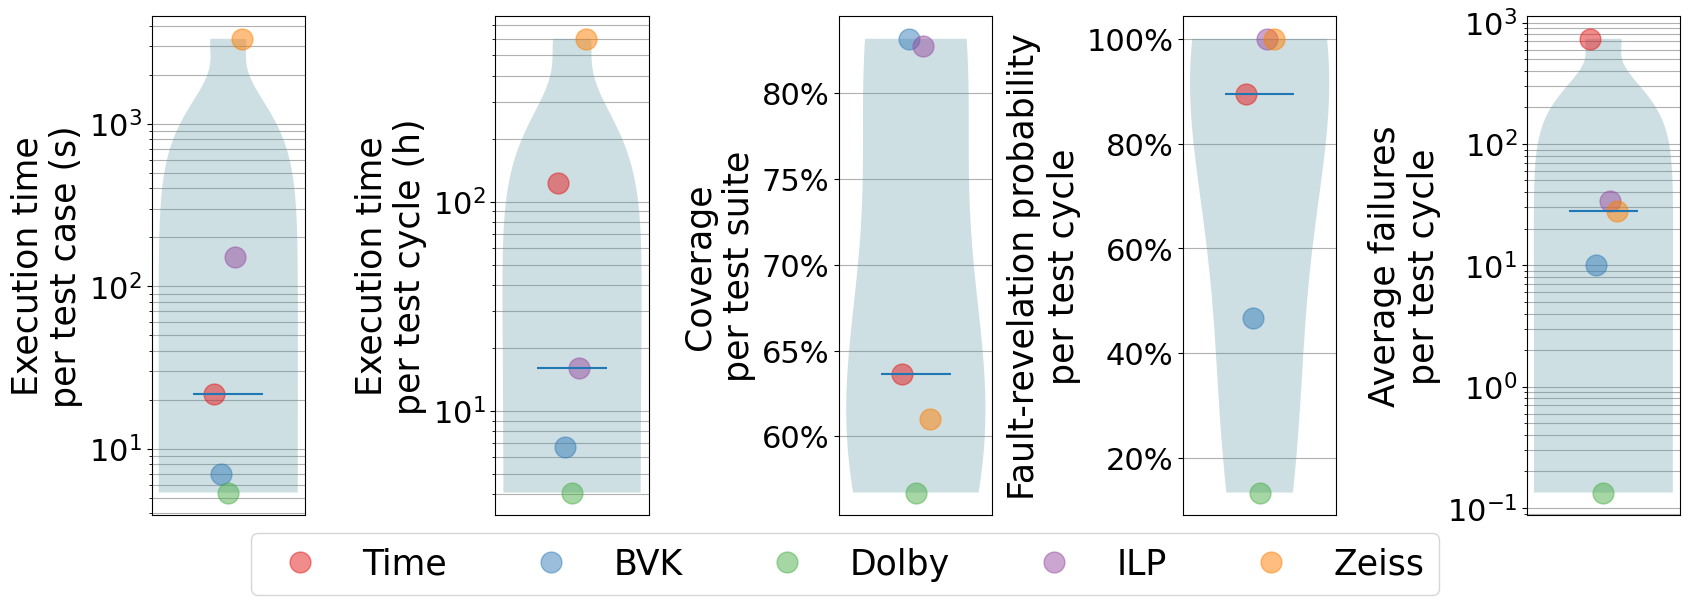

In [70]:
multi_violinplot(
    data, labels, scales, "rq1-4-cost-benefit.pdf", ytickspaces, format_percentages
)